<a href="https://colab.research.google.com/github/TheNamesShadow/RCP-Ocean-Acidification-Forecasting/blob/main/RF_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


<ipython-input-1-1401a411028f>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(years, RF_percent[column], bottom=bars, color=plt.cm.get_cmap('tab20')(i * 4), edgecolor='white', width=barWidth)


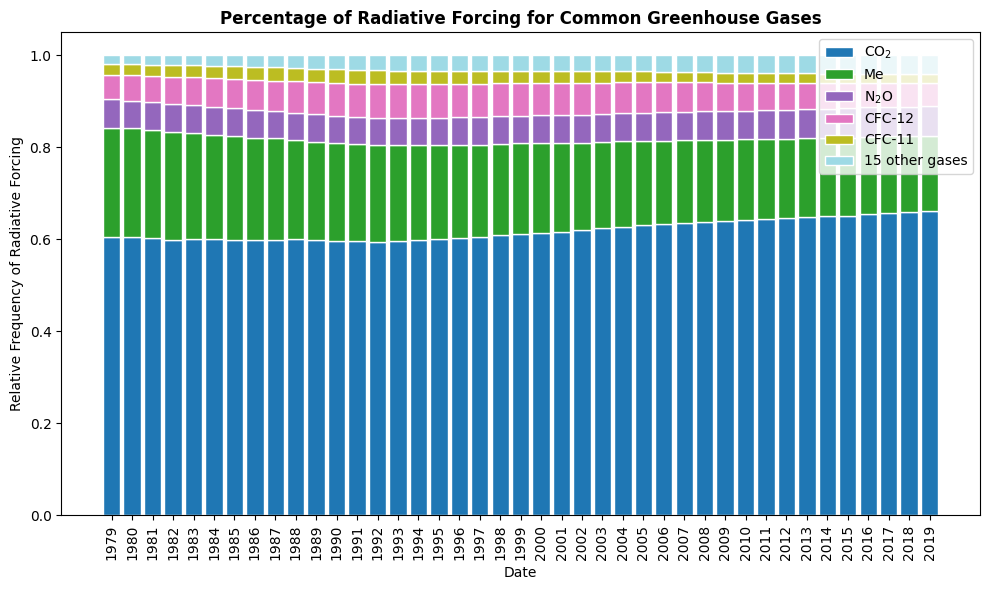

<ipython-input-1-1401a411028f>:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(years, RF[column], bottom=bars, color=plt.cm.get_cmap('tab20')(i * 4), edgecolor='white', width=barWidth)


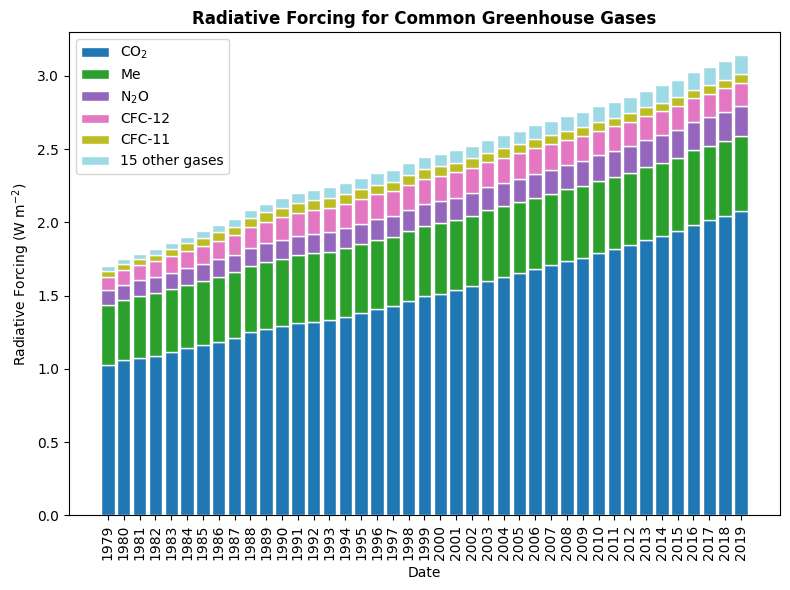

    year    mean   unc           C
0   1979  336.84   NaN  336.840000
1   1980  338.76   NaN  338.846342
2   1981  340.12   NaN  339.995281
3   1982  341.48   NaN  340.902784
4   1983  343.15   NaN  343.185101
5   1984  344.85   NaN  344.797380
6   1985  346.35  0.07  346.306458
7   1986  347.61  0.07  347.812793
8   1987  349.31  0.10  349.412641
9   1988  351.69  0.07  351.929561
10  1989  353.20  0.07  353.378379
11  1990  354.45  0.07  354.420033
12  1991  355.70  0.07  355.742494
13  1992  356.54  0.06  356.450350
14  1993  357.21  0.07  357.292122
15  1994  358.96  0.08  358.718660
16  1995  360.97  0.05  360.821500
17  1996  362.74  0.04  362.841923
18  1997  363.88  0.05  363.853552
19  1998  366.84  0.04  366.538600
20  1999  368.54  0.05  369.025033
21  2000  369.71  0.06  369.813021
22  2001  371.32  0.05  371.271453
23  2002  373.45  0.04  373.388630
24  2003  375.98  0.04  376.034419
25  2004  377.70  0.06  377.929762
26  2005  379.98  0.05  379.731420
27  2006  382.09  0.

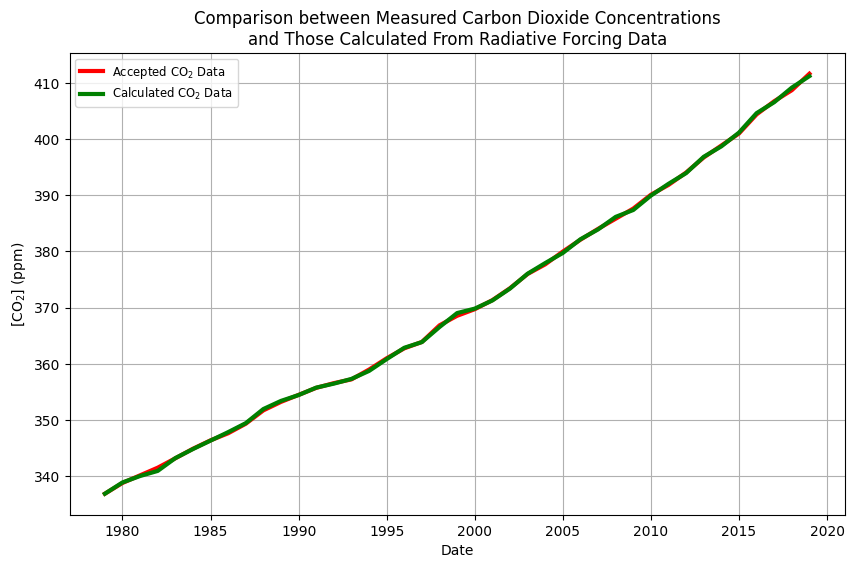

Estimated L: 8.918309631403861
Estimated P0: 2.4242585725426515
Estimated k: 0.03018601732793255
Estimated x0: 1999.4452167329932
Estimated c: 1.5399197820985595


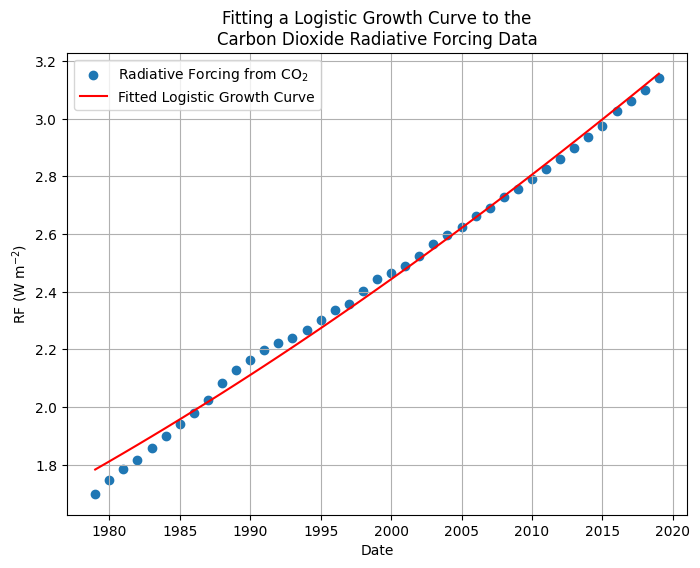

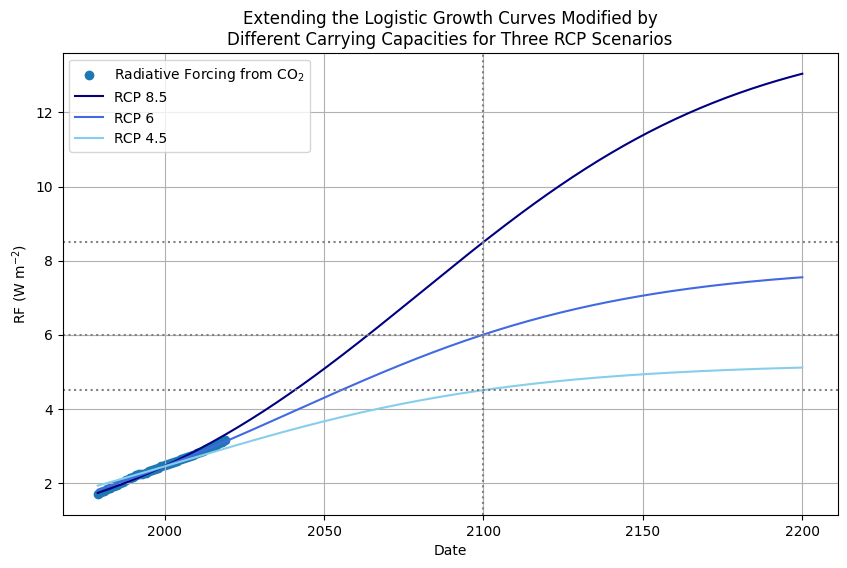

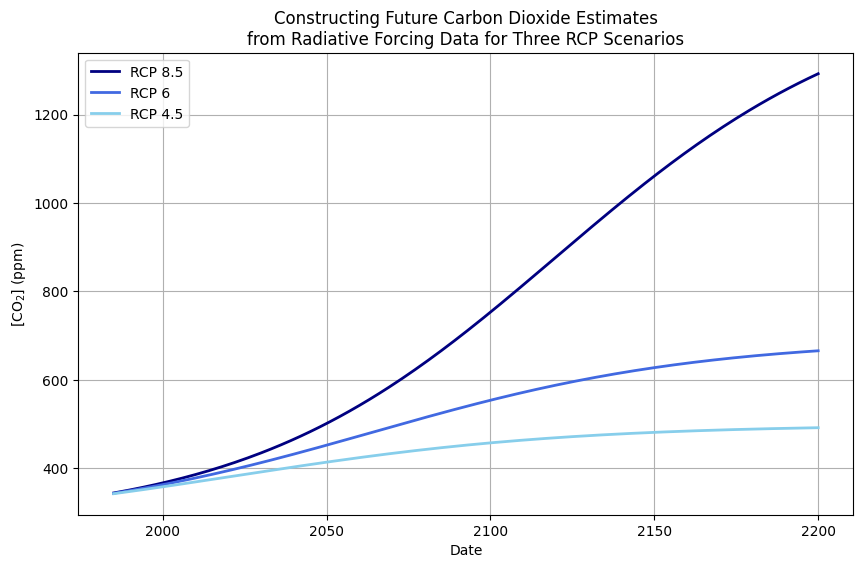

<ipython-input-1-1401a411028f>:352: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CO2df = CO2df.append(AddRowCO2, ignore_index=True)
<ipython-input-1-1401a411028f>:352: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CO2df = CO2df.append(AddRowCO2, ignore_index=True)
<ipython-input-1-1401a411028f>:352: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CO2df = CO2df.append(AddRowCO2, ignore_index=True)
<ipython-input-1-1401a411028f>:352: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CO2df = CO2df.append(AddRowCO2, ignore_index=True)
<ipython-input-1-1401a411028f>:352: FutureWarning: The frame.append method is deprecated and will be removed fro

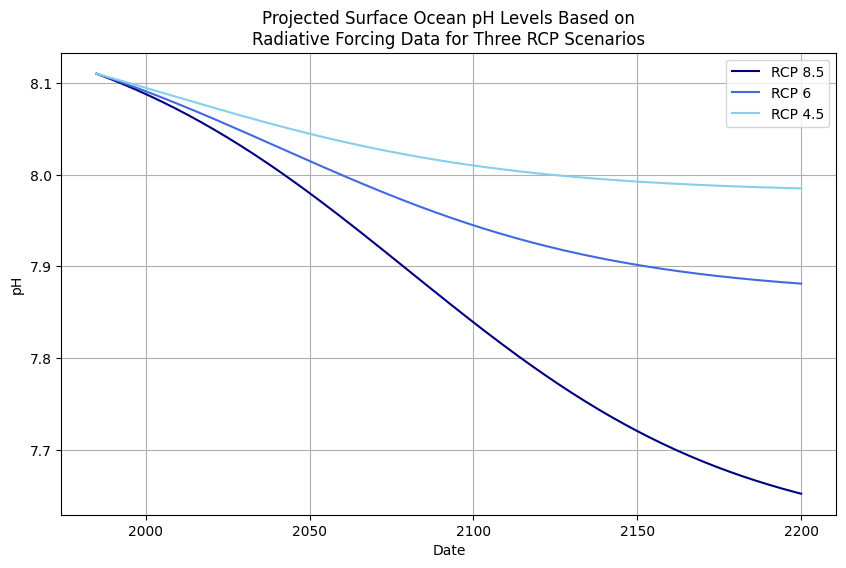

        multipliers
date               
1985.0     8.110000
1986.0     8.108660
1987.0     8.107301
1988.0     8.105922
1989.0     8.104523
1990.0     8.103105
1991.0     8.101667
1992.0     8.100209
1993.0     8.098731
1994.0     8.097233
1995.0     8.095714
1996.0     8.094174
1997.0     8.092614
1998.0     8.091033
1999.0     8.089431
2000.0     8.087808
2001.0     8.086164
2002.0     8.084499
2003.0     8.082813
2004.0     8.081105
2005.0     8.079376
2006.0     8.077625
2007.0     8.075853
2008.0     8.074059
2009.0     8.072244
2010.0     8.070407
2011.0     8.068548
2012.0     8.066668
2013.0     8.064765
2014.0     8.062841
2015.0     8.060895
2016.0     8.058928
2017.0     8.056939
2018.0     8.054928
2019.0     8.052895
2020.0     8.050841
2021.0     8.048765
2022.0     8.046667
2023.0     8.044549
2024.0     8.042408
2025.0     8.040247
2026.0     8.038064
2027.0     8.035861
2028.0     8.033636
2029.0     8.031391
2030.0     8.029125
2031.0     8.026839
2032.0     8.024532


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.dates as mdates
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.optimize import minimize

RF = pd.read_csv('/content/drive/MyDrive/OceanAcidificationData/Data/EPA Radiative Forcing Data (1979 to 2019).csv')
RF = RF.rename(columns={'Carbon dioxide': 'CO$_2$', 'Methane': 'Me', 'Nitrous oxide': 'N$_2$O'})

# Making the data percentage-based
RF_percent = RF.copy()
for i in range(len(RF_percent)):
  total_RF = RF_percent.loc[i,'CO$_2$'] + RF_percent.loc[i,'Me'] + RF_percent.loc[i,'N$_2$O'] + RF_percent.loc[i,'CFC-12'] + RF_percent.loc[i,'CFC-11'] + RF_percent.loc[i,'15 other gases']
  RF_percent.iloc[i] /= total_RF
  RF_percent.loc[i,'Year'] *= total_RF

# PERCENTAGE BASED GRAPH
# Create a stacked bar graph
plt.figure(figsize=(10, 6))

barWidth = 0.85
years = RF_percent['Year']
bars = [0] * len(RF_percent)

# Stacked bars
for i, column in enumerate(RF_percent.columns[1:]):
    plt.bar(years, RF_percent[column], bottom=bars, color=plt.cm.get_cmap('tab20')(i * 4), edgecolor='white', width=barWidth)
    bars += RF_percent[column]

plt.xlabel('Date')
plt.ylabel('Relative Frequency of Radiative Forcing')
plt.title('Percentage of Radiative Forcing for Common Greenhouse Gases', fontweight='bold')
plt.legend(RF_percent.columns[1:], loc='upper right')
plt.xticks(years, rotation=90)
plt.tight_layout()

plt.savefig('Percentage of Radiative Forcing for Common Greenhouse Gases.png')
plt.show()

RF_percent_average = RF_percent['CO$_2$'].mean()

# RAW RF DATA GRAPH
# Create a stacked bar graph
plt.figure(figsize=(8, 6))

barWidth = 0.85
years = RF['Year']
bars = [0] * len(RF)

# Stacked bars
for i, column in enumerate(RF.columns[1:]):
    plt.bar(years, RF[column], bottom=bars, color=plt.cm.get_cmap('tab20')(i * 4), edgecolor='white', width=barWidth)
    bars += RF[column]

plt.xlabel('Date')
plt.ylabel('Radiative Forcing (W m$^{-2}$)')
plt.title('Radiative Forcing for Common Greenhouse Gases', fontweight='bold')
plt.legend(RF.columns[1:], loc='upper left')
plt.xticks(years, rotation=90)
plt.tight_layout()
plt.savefig('Radiative Forcing for Common Greenhouse Gases.png')
plt.show()



# CO2 GRAPHING
CO2 = pd.read_csv('/content/drive/MyDrive/OceanAcidificationData/ESRLGlobalCO2.csv')
"""
plt.figure(figsize=(12, 6))
sns.lineplot(data=CO2, x='year', y='mean', linewidth=3, label='Worldwide Averaged CO2 Concentrations between 1959 and 2022')
plt.legend(fontsize='small')
plt.ylabel('Carbon Dioxide Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()
"""

# Removing rows so that the dataframes have the same length
for i in range(20):
  CO2 = CO2.drop(i)
CO2 = CO2.drop(63)
CO2 = CO2.drop(62)
CO2 = CO2.drop(61)
CO2.reset_index(drop=True, inplace=True)


# Verifying RF values (dRF = 5.22ln(C/C_0))
for i in range(len(CO2)):
  C_0 = CO2.loc[i,'mean']
  if i != 40:
    dRF = RF.loc[i+1,'CO$_2$'] - RF.loc[i,'CO$_2$']
  C = math.exp(dRF/5.22)*C_0
  if i != 40:
    CO2.loc[i+1,'C'] = C
CO2.loc[0,'C'] = 336.84
print(CO2)


# Comparing the CO2 graphs
plt.figure(figsize=(10, 6))
sns.lineplot(data=CO2, x='year', y='mean', label='Accepted CO$_2$ Data', color='red', linewidth=3)
sns.lineplot(data=CO2, x='year', y='C', label='Calculated CO$_2$ Data', color='green', linewidth=3)
plt.legend(fontsize='small')
plt.ylabel('[CO$_2$] (ppm)')
plt.xlabel('Date')
plt.title('Comparison between Measured Carbon Dioxide Concentrations\nand Those Calculated From Radiative Forcing Data')
plt.grid(True)
plt.savefig('Comparison between Measured Carbon Dioxide Concentrations and Those Calculated From Radiative Forcing Data.png')
plt.show()







# Extracting data from the dataframe
years = RF['Year'].values
RF_values = RF['CO$_2$'].values + RF['N$_2$O'].values + RF['Me'].values + RF['CFC-12'].values + RF['CFC-11'].values + RF['15 other gases'].values

# Define the logistic growth equation (Richards growth model)
def logistic_growth(x, L, P0, k, x0, c):
    return L / (1 + ((L - P0) / P0) * np.exp(-k * (x - x0)) ** (1 / c))



# Additional point (2100, 8.5)
additional_point = (2100, 6.5)

# Append the additional point to the data
years_with_point = np.append(years, additional_point[0])
RF_values_with_point = np.append(RF_values, additional_point[1])

# Curve fitting to estimate parameters
p0 = (max(RF_values), min(RF_values), 0.1, np.mean(years), 1.0)  # Initial guess for parameters
params, _ = curve_fit(logistic_growth, years_with_point, RF_values_with_point, p0=p0)

# Estimated parameters
L_est, P0_est, k_est, x0_est, c_est = params

# Print the estimated parameters
print(f"Estimated L: {L_est}")
print(f"Estimated P0: {P0_est}")
print(f"Estimated k: {k_est}")
print(f"Estimated x0: {x0_est}")
print(f"Estimated c: {c_est}")



# Plotting the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(years, RF_values, label='Radiative Forcing from CO$_2$')
plt.plot(years, logistic_growth(years, *params), color='red', label='Fitted Logistic Growth Curve')
plt.title('Fitting a Logistic Growth Curve to the\nCarbon Dioxide Radiative Forcing Data')
plt.xlabel('Date')
plt.ylabel('RF (W m$^{-2}$)')
plt.grid(True)
plt.legend()
plt.savefig('Fitting a Logistic Growth Curve to the Carbon Dioxide Radiative Forcing Data.png')
plt.show()





# Assuming you have the estimated parameter values
P0 = P0_est  # Initial population
k = k_est  # Growth rate constant
x0 = x0_est  # x-value at which P0 occurs
c = c_est  # Shape parameter

E = np.exp(-k * (2100 - x0))
RCP = pd.DataFrame()

for i in range(1,4):
  if i == 1:
    Px = 8.5
  if i == 2:
    Px = 6
  if i == 3:
    Px = 4.5
  if i == 4:
    Px = 2.6
  # Determining the carrying capacity based on P(x) value
  L = (P0*Px*(1-(E)**(1/c))) / (P0-Px*(E)**(1/c))
  # Define the logistic growth equation (Richards growth model)
  def logistic_growth_equation(x):
      return L / (1 + ((L - P0) / P0) * np.exp(-k * (x - x0)) ** (1 / c))

  # Generate x values from 1979 to 2200
  x_values = np.arange(1979, 2201)  # Year range from 1979 to 2200

  # Calculate corresponding population values using the logistic growth equation
  population_values = logistic_growth_equation(x_values)

  if i == 1:
  # Plotting the logistic growth curve
    plt.figure(figsize=(10, 6))
    plt.scatter(years, RF_values, label='Radiative Forcing from CO$_2$')
    plt.plot(x_values, population_values, label='RCP 8.5', color='Navy')
    plt.xlabel('Date')
    plt.ylabel('RF (W m$^{-2}$)')
    plt.title('Extending the Logistic Growth Curves Modified by\nDifferent Carrying Capacities for Three RCP Scenarios')
    plt.axhline(y=8.5, color='gray', linestyle=':')
    plt.axvline(x=2100, color='gray', linestyle=':')
    RCP['RCP8.5'] = population_values
  if i == 2:
    plt.plot(x_values, population_values, label='RCP 6', color='royalblue')
    plt.axhline(y=6, color='gray', linestyle=':')
    RCP['RCP6'] = population_values
  if i == 3:
    plt.plot(x_values, population_values, label='RCP 4.5', color='skyblue')
    plt.axhline(y=4.5, color='gray', linestyle=':')
    RCP['RCP4.5'] = population_values
  if i == 4:
    plt.plot(x_values, population_values, label='RCP 2.6', color='cyan')
    plt.axhline(y=2.6, color='gray', linestyle=':')
    RCP['RCP2.6'] = population_values
RCP['year'] = x_values

plt.legend()
plt.grid(True)
plt.savefig('Extending the Logistic Growth Curves Modified by Different Carrying Capacities for Three RCP Scenarios.png')
plt.show()



# Adjusting RF to only include CO2 RF
RCP['RCP8.5'] *= RF_percent_average
RCP['RCP6'] *= RF_percent_average
RCP['RCP4.5'] *= RF_percent_average



# Generating a CO2 estimate based on RF values
RCP['C_8.5'] = None
for i in range(len(RCP)):
  if i == 0:
    C0 = 336.84
  else:
    C0 = RCP.loc[i,'C_8.5']
  if i <= 220:
    dRF = RCP.loc[i+1,'RCP8.5'] - RCP.loc[i,'RCP8.5']
    C = np.exp(dRF/5.22) * C0
    RCP.loc[i+1,'C_8.5'] = C

RCP['C_6'] = None
for i in range(len(RCP)):
  if i == 0:
    C0 = 336.84
  else:
    C0 = RCP.loc[i,'C_6']
  if i <= 220:
    dRF = RCP.loc[i+1,'RCP6'] - RCP.loc[i,'RCP6']
    C = np.exp(dRF/5.22) * C0
    RCP.loc[i+1,'C_6'] = C

RCP['C_4.5'] = None
for i in range(len(RCP)):
  if i == 0:
    C0 = 336.84
  else:
    C0 = RCP.loc[i,'C_4.5']
  if i <= 220:
    dRF = RCP.loc[i+1,'RCP4.5'] - RCP.loc[i,'RCP4.5']
    C = np.exp(dRF/5.22) * C0
    RCP.loc[i+1,'C_4.5'] = C
"""
RCP['C_2.6'] = None
for i in range(len(RCP)):
  if i == 0:
    C0 = 336.84
  else:
    C0 = RCP.loc[i,'C_2.6']
  if i <= 220:
    dRF = RCP.loc[i+1,'RCP2.6'] - RCP.loc[i,'RCP2.6']
    C = np.exp(dRF/5.22) * C0
    RCP.loc[i+1,'C_2.6'] = C
"""
for i in range(10):
  if RCP.loc[i,'year'] < 1985:
    RCP.drop(i, inplace=True)
RCP.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=RCP, x=RCP['year'], y=RCP['C_8.5'], linewidth=2, label='RCP 8.5', color='Navy')
sns.lineplot(data=RCP, x=RCP['year'], y=RCP['C_6'], linewidth=2, label='RCP 6', color='royalblue')
sns.lineplot(data=RCP, x=RCP['year'], y=RCP['C_4.5'], linewidth=2, label='RCP 4.5', color='skyblue')
#sns.lineplot(data=RCP, x=RCP['year'], y=RCP['C_2.6'], linewidth=2, label='RCP 2.6', color='cyan')

plt.legend(fontsize='small')
plt.title('Constructing Future Carbon Dioxide Estimates\nfrom Radiative Forcing Data for Three RCP Scenarios')
plt.xlabel('Date')
plt.ylabel('[CO$_2$] (ppm)')
plt.legend()
plt.grid(True)
plt.savefig('Constructing Future Carbon Dioxide Estimates from Radiative Forcing Data for Three RCP Scenarios.png')
plt.show()

#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&



# CONVERTING CO2 TO PH ******************************************************************************************************************************************************

#Calling the data files
CO2graph = pd.read_csv('/content/drive/MyDrive/OceanAcidificationData/ESRLGlobalCO2.csv')
df = pd.read_csv('/content/drive/MyDrive/OceanAcidificationData/EPAGlobalCO2.csv')
pHAccepted = pd.read_csv('/content/drive/MyDrive/OceanAcidificationData/PhAccepted.csv')
pHAccepted['date'] = pd.to_datetime(pHAccepted['date'], format='%Y')
df['year'] = pd.to_datetime(df['year'], format='%Y')

#Setting some variables for future use
K1 = 1
K2 = 3 * (10 ** -3)
K3 = 2 * (10 ** -4)
K4 = 6 * (10 ** -11)

pHi = 8.11
Hi = 10 ** -8.11

#Creating several data frames that will be filled later
CO2df = pd.DataFrame()
pHdf = pd.DataFrame()
CO2values = pd.DataFrame()
CO2df['CO2 Injection'] = pd.Series(dtype='float64')
CO2df['Final H'] = pd.Series(dtype='float64')
pHdf['pH'] = pd.Series(dtype='float64')
CO2values['CO2 Values'] = pd.Series(dtype='float64')
pHdf.loc[0,'pH'] = pHi

#Converting ppm values to molarity (mol/L) and saving those values to a data frame
for i in range(0,len(df)):
  ppm = df.loc[i,'mean']
  CO2i = ppm / 22.41 * (10 ** -6)
  CO2values.loc[i,'CO2 Values'] = CO2i

#Calculating values for carbonic acid conc., bicarbonate conc., and others, then adding those values to a data frame. The equilibrium H conc. was also calculated and added to a separate data frame
for j in range(0,len(df)):
  Carbonic = K2 * CO2values.loc[j,'CO2 Values']
  bicarb = K3 * Carbonic / (10 ** (-1 * pHdf.loc[j,'pH']))
  AddRowCO2 = {'date':df.loc[j,'year'], 'CO2 initial':df.loc[0,'mean'], 'Carbonic Acid':Carbonic, 'Bicarbonate':bicarb}
  CO2df = CO2df.append(AddRowCO2, ignore_index=True)
  if j != (len(df) - 1):
    CO2df.loc[j,'CO2 Injection'] = CO2values.loc[(j+1),'CO2 Values'] - CO2values.loc[j,'CO2 Values']
    H = 10 ** (pHdf.loc[j,'pH'] * -1)
  CO2df.loc[j,'Final H'] = H - (CO2df.loc[j,'Bicarbonate'] / 2) + math.sqrt((((CO2df.loc[j,'Bicarbonate']) ** 2) / 4) + (K1 * K2 * K3 * CO2df.loc[j,'CO2 Injection']) / (K1 + 1))
  pHdf.loc[j+1,'pH'] = math.log(CO2df.loc[j,'Final H'], 10) * -1

#Adding a date column to a data frame
pHdf['date'] = pd.Series(dtype='float64')
for i in range(0,len(df)):
  pHdf.loc[i,'date'] = df.loc[i,'year']

#Creating another data frame and adding in 3 empty columns to be filled later
CO2diff = pd.DataFrame()
CO2diff['Calculated CO2 Difference'] = pd.Series(dtype='float64')
CO2diff['Accepted CO2 Difference'] = pd.Series(dtype='float64')
CO2diff['Percentage of Acidification Due to CO2'] = pd.Series(dtype='float64')

#Calculating some values and adding them to a data frame then plotting it
for i in range(0,36):
  CO2diff.loc[i,'Calculated CO2 Difference'] = 8.11 - pHdf.loc[i,'pH']
  CO2diff.loc[i,'Accepted CO2 Difference'] = 8.11 - pHAccepted.loc[i,'ph']
  CO2diff.loc[i,'Percentage of Acidification Due to CO2'] = CO2diff.loc[i,'Calculated CO2 Difference'] / CO2diff.loc[i,'Accepted CO2 Difference']
AdjustedCO2diff = CO2diff[CO2diff['Percentage of Acidification Due to CO2'] != 0]
for i in range(0,len(df)):
  AdjustedCO2diff.loc[i,'date'] = df.loc[i,'year']


AdjustedCO2diff.set_index('date', inplace=True)
AdjustedCO2diff['numerical_date'] = mdates.date2num(AdjustedCO2diff.index)
# Set the size of the plot
#plt.figure(figsize=(12, 6))
# Create the scatter plot
#ax = sns.scatterplot(data=AdjustedCO2diff, x='numerical_date', y='Percentage of Acidification Due to CO2', label='Percent Ocean Acidification as a Product of Carbon Dioxide', color='darkblue')
# Add a line of best fit
mask = ~AdjustedCO2diff['Percentage of Acidification Due to CO2'].isna()
slope, intercept, r_value, p_value, std_err = linregress(AdjustedCO2diff['numerical_date'][mask], AdjustedCO2diff['Percentage of Acidification Due to CO2'][mask])
"""
sns.regplot(data=AdjustedCO2diff, x='numerical_date', y='Percentage of Acidification Due to CO2', scatter=False, ax=ax)




tick_positions = range(0, len(AdjustedCO2diff.index), 3)
ax.set_xticks(AdjustedCO2diff['numerical_date'][tick_positions])
ax.set_xticklabels(AdjustedCO2diff.index[tick_positions].strftime('%Y'))

if not (pd.isna(slope) or pd.isna(intercept)):
    equation = f'y = {slope:.5f}x + {intercept:.5f}\nR-squared = {r_value**2:.5f}'
    plt.text(0.05, 0.9, equation, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.legend()
plt.show()
"""

################################################################################################################################################################################
#Setting some variables for future use
K1 = 1
K2 = 3 * (10 ** -3)
K3 = 2 * (10 ** -4)
K4 = 6 * (10 ** -11)

# RCP 8.5

pHi = 8.11
Hi = 10 ** -8.11

#Creating several data frames that will be filled later
CO2df2 = pd.DataFrame()
pHdf2 = pd.DataFrame()
CO2values2 = pd.DataFrame()
CO2df2['CO2 Injection'] = pd.Series(dtype='float64')
CO2df2['Final H'] = pd.Series(dtype='float64')
pHdf2['pH'] = pd.Series(dtype='float64')
CO2values2['CO2 Values'] = pd.Series(dtype='float64')
pHdf2.loc[0,'pH'] = pHi

#Converting ppm values to molarity (mol/L) and saving those values to a data frame
for i in range(0,len(RCP)):
  ppm = RCP.loc[i,'C_8.5']
  CO2i2 = ppm / 22.41 * (10 ** -6)
  CO2values2.loc[i,'CO2 Values'] = CO2i2

#Calculating values for carbonic acid conc., bicarbonate conc., and others, then adding those values to a data frame. The equilibrium H conc. was also calculated and added to a separate data frame
for j in range(0,len(RCP)):
  Carbonic2 = K2 * CO2values2.loc[j,'CO2 Values']
  bicarb2 = K3 * Carbonic2 / (10 ** (-1 * pHdf2.loc[j,'pH']))
  AddRowCO22 = {'date':RCP.loc[j,'year'], 'CO2 initial':RCP.loc[0,'C_8.5'], 'Carbonic Acid':Carbonic2, 'Bicarbonate':bicarb2}
  CO2df2 = CO2df2.append(AddRowCO22, ignore_index=True)
  if j != (len(RCP) - 1):
    CO2df2.loc[j,'CO2 Injection'] = CO2values2.loc[(j+1),'CO2 Values'] - CO2values2.loc[j,'CO2 Values']
    H2 = 10 ** (pHdf2.loc[j,'pH'] * -1)
  CO2df2.loc[j,'Final H'] = H2 - (CO2df2.loc[j,'Bicarbonate'] / 2) + math.sqrt((((CO2df2.loc[j,'Bicarbonate']) ** 2) / 4) + (K1 * K2 * K3 * CO2df2.loc[j,'CO2 Injection']) / (K1 + 1))
  pHdf2.loc[j+1,'pH'] = math.log(CO2df2.loc[j,'Final H'], 10) * -1

#Adding a date column to a data frame
pHdf2['date'] = pd.Series(dtype='float64')
for i in range(0,len(RCP)):
  pHdf2.loc[i,'date'] = RCP.loc[i,'year']



multiplier_df85 = pd.DataFrame()
multiplier_df85['multipliers'] = pd.Series(dtype='float64')
multiplier_df85['date'] = pd.Series(dtype='float64')
pHdf2.dropna(inplace=True)
pHdf2['numerical_date'] = mdates.date2num(pHdf2['date'])

for k in range(len(pHdf2)):
  multiplier = pHdf2.loc[k,'numerical_date'] * slope + intercept
  multiplier_df85.loc[k,'multipliers'] = 8.11 - ((8.11 - pHdf2.loc[k,'pH']) / multiplier)

for i in range(0,len(pHdf2)):
  multiplier_df85.loc[i,'date'] = pHdf2.loc[i,'date']


multiplier_df85.set_index('date', inplace=True)

################################################################################################################################################################################

# RCP 6

pHi = 8.11
Hi = 10 ** -8.11

#Creating several data frames that will be filled later
CO2df2 = pd.DataFrame()
pHdf2 = pd.DataFrame()
CO2values2 = pd.DataFrame()
CO2df2['CO2 Injection'] = pd.Series(dtype='float64')
CO2df2['Final H'] = pd.Series(dtype='float64')
pHdf2['pH'] = pd.Series(dtype='float64')
CO2values2['CO2 Values'] = pd.Series(dtype='float64')
pHdf2.loc[0,'pH'] = pHi

#Converting ppm values to molarity (mol/L) and saving those values to a data frame
for i in range(0,len(RCP)):
  ppm = RCP.loc[i,'C_6']
  CO2i2 = ppm / 22.41 * (10 ** -6)
  CO2values2.loc[i,'CO2 Values'] = CO2i2

#Calculating values for carbonic acid conc., bicarbonate conc., and others, then adding those values to a data frame. The equilibrium H conc. was also calculated and added to a separate data frame
for j in range(0,len(RCP)):
  Carbonic2 = K2 * CO2values2.loc[j,'CO2 Values']
  bicarb2 = K3 * Carbonic2 / (10 ** (-1 * pHdf2.loc[j,'pH']))
  AddRowCO22 = {'date':RCP.loc[j,'year'], 'CO2 initial':RCP.loc[0,'C_6'], 'Carbonic Acid':Carbonic2, 'Bicarbonate':bicarb2}
  CO2df2 = CO2df2.append(AddRowCO22, ignore_index=True)
  if j != (len(RCP) - 1):
    CO2df2.loc[j,'CO2 Injection'] = CO2values2.loc[(j+1),'CO2 Values'] - CO2values2.loc[j,'CO2 Values']
    H2 = 10 ** (pHdf2.loc[j,'pH'] * -1)
  CO2df2.loc[j,'Final H'] = H2 - (CO2df2.loc[j,'Bicarbonate'] / 2) + math.sqrt((((CO2df2.loc[j,'Bicarbonate']) ** 2) / 4) + (K1 * K2 * K3 * CO2df2.loc[j,'CO2 Injection']) / (K1 + 1))
  pHdf2.loc[j+1,'pH'] = math.log(CO2df2.loc[j,'Final H'], 10) * -1

#Adding a date column to a data frame
pHdf2['date'] = pd.Series(dtype='float64')
for i in range(0,len(RCP)):
  pHdf2.loc[i,'date'] = RCP.loc[i,'year']



multiplier_df6 = pd.DataFrame()
multiplier_df6['multipliers'] = pd.Series(dtype='float64')
multiplier_df6['date'] = pd.Series(dtype='float64')
pHdf2.dropna(inplace=True)
pHdf2['numerical_date'] = mdates.date2num(pHdf2['date'])

for k in range(len(pHdf2)):
  multiplier = pHdf2.loc[k,'numerical_date'] * slope + intercept
  multiplier_df6.loc[k,'multipliers'] = 8.11 - ((8.11 - pHdf2.loc[k,'pH']) / multiplier)

for i in range(0,len(pHdf2)):
  multiplier_df6.loc[i,'date'] = pHdf2.loc[i,'date']


multiplier_df6.set_index('date', inplace=True)

################################################################################################################################################################################
# RCP 4.5

pHi = 8.11
Hi = 10 ** -8.11

#Creating several data frames that will be filled later
CO2df2 = pd.DataFrame()
pHdf2 = pd.DataFrame()
CO2values2 = pd.DataFrame()
CO2df2['CO2 Injection'] = pd.Series(dtype='float64')
CO2df2['Final H'] = pd.Series(dtype='float64')
pHdf2['pH'] = pd.Series(dtype='float64')
CO2values2['CO2 Values'] = pd.Series(dtype='float64')
pHdf2.loc[0,'pH'] = pHi

#Converting ppm values to molarity (mol/L) and saving those values to a data frame
for i in range(0,len(RCP)):
  ppm = RCP.loc[i,'C_4.5']
  CO2i2 = ppm / 22.41 * (10 ** -6)
  CO2values2.loc[i,'CO2 Values'] = CO2i2

#Calculating values for carbonic acid conc., bicarbonate conc., and others, then adding those values to a data frame. The equilibrium H conc. was also calculated and added to a separate data frame
for j in range(0,len(RCP)):
  Carbonic2 = K2 * CO2values2.loc[j,'CO2 Values']
  bicarb2 = K3 * Carbonic2 / (10 ** (-1 * pHdf2.loc[j,'pH']))
  AddRowCO22 = {'date':RCP.loc[j,'year'], 'CO2 initial':RCP.loc[0,'C_4.5'], 'Carbonic Acid':Carbonic2, 'Bicarbonate':bicarb2}
  CO2df2 = CO2df2.append(AddRowCO22, ignore_index=True)
  if j != (len(RCP) - 1):
    CO2df2.loc[j,'CO2 Injection'] = CO2values2.loc[(j+1),'CO2 Values'] - CO2values2.loc[j,'CO2 Values']
    H2 = 10 ** (pHdf2.loc[j,'pH'] * -1)
  CO2df2.loc[j,'Final H'] = H2 - (CO2df2.loc[j,'Bicarbonate'] / 2) + math.sqrt((((CO2df2.loc[j,'Bicarbonate']) ** 2) / 4) + (K1 * K2 * K3 * CO2df2.loc[j,'CO2 Injection']) / (K1 + 1))
  pHdf2.loc[j+1,'pH'] = math.log(CO2df2.loc[j,'Final H'], 10) * -1

#Adding a date column to a data frame
pHdf2['date'] = pd.Series(dtype='float64')
for i in range(0,len(RCP)):
  pHdf2.loc[i,'date'] = RCP.loc[i,'year']



multiplier_df45 = pd.DataFrame()
multiplier_df45['multipliers'] = pd.Series(dtype='float64')
multiplier_df45['date'] = pd.Series(dtype='float64')
pHdf2.dropna(inplace=True)
pHdf2['numerical_date'] = mdates.date2num(pHdf2['date'])

for k in range(len(pHdf2)):
  multiplier = pHdf2.loc[k,'numerical_date'] * slope + intercept
  multiplier_df45.loc[k,'multipliers'] = 8.11 - ((8.11 - pHdf2.loc[k,'pH']) / multiplier)

for i in range(0,len(pHdf2)):
  multiplier_df45.loc[i,'date'] = pHdf2.loc[i,'date']


multiplier_df45.set_index('date', inplace=True)

################################################################################################################################################################################
# RCP 2.6
"""
pHi = 8.11
Hi = 10 ** -8.11

#Creating several data frames that will be filled later
CO2df2 = pd.DataFrame()
pHdf2 = pd.DataFrame()
CO2values2 = pd.DataFrame()
CO2df2['CO2 Injection'] = pd.Series(dtype='float64')
CO2df2['Final H'] = pd.Series(dtype='float64')
pHdf2['pH'] = pd.Series(dtype='float64')
CO2values2['CO2 Values'] = pd.Series(dtype='float64')
pHdf2.loc[0,'pH'] = pHi

#Converting ppm values to molarity (mol/L) and saving those values to a data frame
for i in range(0,len(RCP)):
  ppm = RCP.loc[i,'C_2.6']
  CO2i2 = ppm / 22.41 * (10 ** -6)
  CO2values2.loc[i,'CO2 Values'] = CO2i2

#Calculating values for carbonic acid conc., bicarbonate conc., and others, then adding those values to a data frame. The equilibrium H conc. was also calculated and added to a separate data frame
for j in range(0,len(RCP)):
  Carbonic2 = K2 * CO2values2.loc[j,'CO2 Values']
  bicarb2 = K3 * Carbonic2 / (10 ** (-1 * pHdf2.loc[j,'pH']))
  AddRowCO22 = {'date':RCP.loc[j,'year'], 'CO2 initial':RCP.loc[0,'C_2.6'], 'Carbonic Acid':Carbonic2, 'Bicarbonate':bicarb2}
  CO2df2 = CO2df2.append(AddRowCO22, ignore_index=True)
  if j != (len(RCP) - 1):
    CO2df2.loc[j,'CO2 Injection'] = CO2values2.loc[(j+1),'CO2 Values'] - CO2values2.loc[j,'CO2 Values']
    H2 = 10 ** (pHdf2.loc[j,'pH'] * -1)
  CO2df2.loc[j,'Final H'] = H2 - (CO2df2.loc[j,'Bicarbonate'] / 2) + math.sqrt((((CO2df2.loc[j,'Bicarbonate']) ** 2) / 4) + (K1 * K2 * K3 * CO2df2.loc[j,'CO2 Injection']) / (K1 + 1))
  pHdf2.loc[j+1,'pH'] = math.log(CO2df2.loc[j,'Final H'], 10) * -1

#Adding a date column to a data frame
pHdf2['date'] = pd.Series(dtype='float64')
for i in range(0,len(RCP)):
  pHdf2.loc[i,'date'] = RCP.loc[i,'year']



multiplier_df26 = pd.DataFrame()
multiplier_df26['multipliers'] = pd.Series(dtype='float64')
multiplier_df26['date'] = pd.Series(dtype='float64')
pHdf2.dropna(inplace=True)
pHdf2['numerical_date'] = mdates.date2num(pHdf2['date'])

for k in range(len(pHdf2)):
  multiplier = pHdf2.loc[k,'numerical_date'] * slope + intercept
  multiplier_df26.loc[k,'multipliers'] = 8.11 - ((8.11 - pHdf2.loc[k,'pH']) / multiplier)

for i in range(0,len(pHdf2)):
  multiplier_df26.loc[i,'date'] = pHdf2.loc[i,'date']


multiplier_df26.set_index('date', inplace=True)
"""
################################################################################################################################################################################

plt.figure(figsize=(10, 6))
sns.lineplot(data=multiplier_df85, x=multiplier_df85.index, y='multipliers', label='RCP 8.5', color='Navy')
sns.lineplot(data=multiplier_df6, x=multiplier_df6.index, y='multipliers', label='RCP 6', color='royalblue')
sns.lineplot(data=multiplier_df45, x=multiplier_df45.index, y='multipliers', label='RCP 4.5', color='skyblue')
#sns.lineplot(data=multiplier_df26, x=multiplier_df26.index, y='multipliers', label='RCP 2.6', color='cyan')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('pH')
plt.title('Projected Surface Ocean pH Levels Based on\nRadiative Forcing Data for Three RCP Scenarios')
plt.legend()
plt.savefig('Projected Surface Ocean pH Levels Based on Radiative Forcing Data for Three RCP Scenarios.png')
plt.show()

pd.set_option('display.max_rows', None)

print(multiplier_df85)
print(multiplier_df6)
print(multiplier_df45)

